# Линейная модель множественной регрессии на примере зависимости расходов на питание от общих расходов домохозяйства
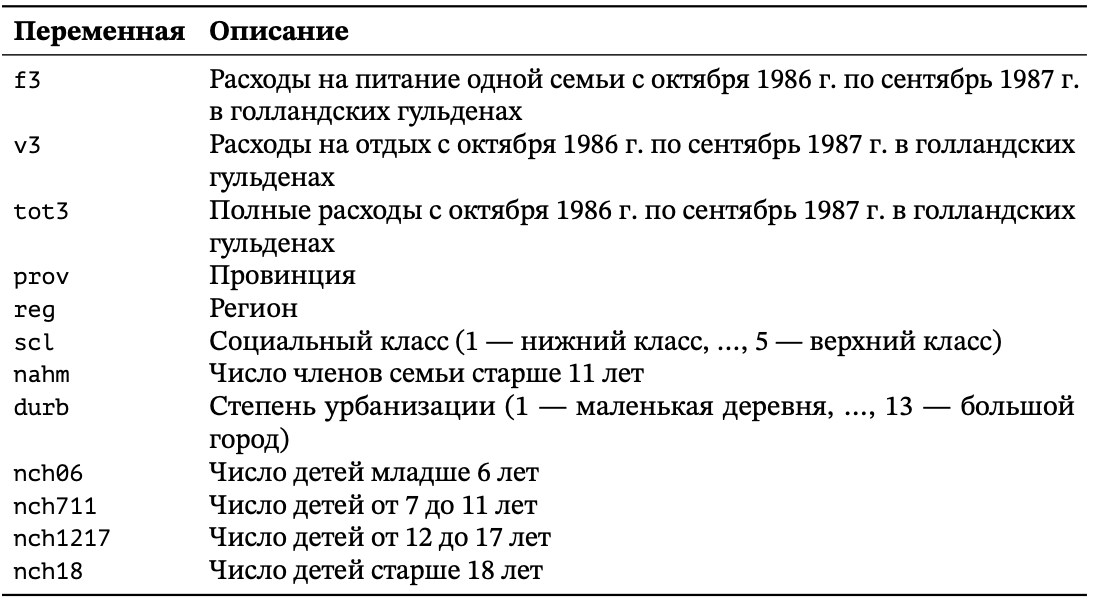

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# set pd/np parameters
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

#  plot imports
import matplotlib.pyplot as plt
import seaborn as sns

# set plt/sns parameters
plt.rcParams["font.size"] = 14
plt.rcParams['figure.figsize'] = (15, 8)
sns.set_style("whitegrid")

### Загрузка данных

In [8]:
data = pd.read_csv('expend.csv')
print(data.head())

       f3      v3     tot3  prov  reg  scl  nahm  durb  nch06  nch711  \
0 4322.27 9022.20 45768.95     5    4    3     2     7      0       0   
1 6218.96  372.95 31959.59     2    3    4     2     6      0       0   
2 2636.80  565.85 20518.39     3    3    2     1     7      0       0   
3 9884.05    0.00 30920.13    11    5    5     3    10      0       1   
4 8718.10 4892.35 66465.31     8    2    3     3     9      0       1   

   nch1217  nch18  
0        0      0  
1        0      0  
2        0      0  
3        1      0  
4        1      0  


### Суммарная статистика переменных tot3 и f3

In [11]:
summary_df2 = data[['tot3', 'f3']].describe().transpose().round(2)
summary_df2

,count,mean,std,min,25%,50%,75%,max
tot3,427.00,35762.81,18053.31,8728.86,23189.46,31847.12,44050.52,124564.19
f3,427.00,6890.88,2745.75,883.99,4946.09,6838.43,8788.36,17270.75


#### Вывод таблицы в экселе

In [14]:
from openpyxl import Workbook
from openpyxl.styles import Font, Border, Side
from openpyxl.utils.dataframe import dataframe_to_rows

def calculate_and_save_summary(df, variables, filename='summary_statistics.xlsx', title='Summary Statistics'):
    
    #df (DataFrame): исходный DataFrame.
    #variables (list): список переменных для анализа.
    #filename (str): имя файла Excel для сохранения результата.
    #title (str): заголовок таблицы в Excel.

    #расчёт суммарной статистики
    summary_df = df[variables].describe().transpose().round(2)
    
    #словарь для перевода названий переменных
    column_names = {
        'tot3': 'Полные расходы',
        'f3': 'Расходы на питание',
        'log_tot3': 'Log полных расходов',
        'log_f3': 'Log расходов на питание',
    }
    renamed_df = summary_df.rename(index=column_names)

    #создание нового Excel-файла
    wb = Workbook()
    ws = wb.active
    ws.title = 'Statistics'

    #заголовок
    ws.append([title])
    ws["A1"].font = Font(bold=True, size=14)
    ws.append([]) 

    #добавление строк из DataFrame в Excel-лист
    for r_idx, row in enumerate(dataframe_to_rows(renamed_df, index=True, header=True), start=3):
        ws.append(row)
        
        if r_idx > 2: 
            for cell in ws[r_idx]:
                cell.border = Border(
                    left=Side(style='thin'),
                    right=Side(style='thin'),
                    top=Side(style='thin'),
                    bottom=Side(style='thin')
                )

    ws.delete_rows(4)

    #сохранение файла
    wb.save(filename)
    print(f"Таблица сохранена в файл: {filename}")


calculate_and_save_summary(data, ['tot3', 'f3'], 'summary(2).xlsx', 'Суммарная статистика для tot3 и f3')

Таблица сохранена в файл: summary(2).xlsx


### Cуммарная статистика переменных log_tot3, log_f3 и tot3, f3

In [18]:
data['log_tot3'] = np.log(data['tot3'])
data['log_f3'] = np.log(data['f3'])

summary_df3 = data[['tot3', 'f3', 'log_tot3', 'log_f3']].describe().transpose()
summary_df3

,count,mean,std,min,25%,50%,75%,max
tot3,427.00,35762.81,18053.31,8728.86,23189.46,31847.12,44050.52,124564.19
f3,427.00,6890.88,2745.75,883.99,4946.09,6838.43,8788.36,17270.75
log_tot3,427.00,10.37,0.48,9.07,10.05,10.37,10.69,11.73
log_f3,427.00,8.74,0.48,6.78,8.51,8.83,9.08,9.76


In [20]:
# сохранение таблицы для log_tot3, log_f3 и tot3, f3 через функции

calculate_and_save_summary(data, ['tot3', 'f3', 'log_tot3', 'log_f3'], 'summary(3).xlsx', 
                           'Суммарная статистика для tot3, f3, log_tot3, log_f3')

Таблица сохранена в файл: summary(3).xlsx


### Парная регрессия log_f3 на log_tot3

In [25]:
X_4 = sm.add_constant(data['log_tot3'])
y = data['log_f3']
model_4 = sm.OLS(y, X_4).fit(cov_type='HC0')

print(model_4.summary())

# Доверительный интервал для коэффициента
conf_int = model_4.conf_int().loc['log_tot3']
print(f"95%-й доверительный интервал: {conf_int.values}")

                            OLS Regression Results                            
Dep. Variable:                 log_f3   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     163.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           7.16e-32
Time:                        02:11:23   Log-Likelihood:                -208.53
No. Observations:                 427   AIC:                             421.1
Df Residuals:                     425   BIC:                             429.2
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0466      0.449      6.781      0.0

#### Для вывода более красивого формата таблиц напишем функцию, используем старгейзер

In [28]:
from stargazer.stargazer import Stargazer

def generate_stargazer_html(models, title, output_file, dependent_var_name ='Зависимая переменная'):

    #models: Список регрессионных моделей (экземпляров statsmodels.api.OLS).
    #model_names: Словарь перевода названий переменных на русский.
    #title (str): Заголовок таблицы.
    #output_file (str): Имя HTML-файла для сохранения.
    
    #cоздаем объект Stargazer для всех моделей
    stargazer = Stargazer(models)
    stargazer.title(title)
    
    #pаменяем названия переменных на русские
    model_names = {
        'const': 'Константа',
        'tot3': 'Полные расходы',
        'f3': 'Расходы на питание',
        'log_tot3': 'Log полных расходов',
        'log_f3': 'Log расходов на питание',
        'nch06': 'Число детей младше 6 лет',
        'nch711': 'Число детей от 7 до 11 лет',
        'nahm': 'Число детей старше 11 лет',
        'nch1217': 'Число детей от 12 до 17 лет',
        'nch18': 'Число детей старше 18 лет',
        'prov': 'Провинция',
        'reg': 'Регион',
        'scl': 'Социальный класс'
    }
    stargazer.rename_covariates(model_names)
    
    #удаляем ненужные метрики из таблицы
    stargazer.covariate_order = list(model_names.keys())  # упорядочиваем переменные
    stargazer.show_residual_std_err = False
    stargazer.show_f_statistic = False
    stargazer.show_adj_r2 = False

    #генерация HTML
    html = stargazer.render_html()
    html = html.replace('Dependent variable: log_f3', dependent_var_name)  #переименовываем
    html = html.replace('Observations', 'Число наблюдений')
    html = html.replace('Note', 'Замечание')   

    #генерация полного HTML-документа
    stargazer_html = f"""
    <!DOCTYPE html>
    <html>
    <head>
    <meta charset="UTF-8">
    <title>Результаты регрессии</title>
    </head>
    <body>
    {html}
    </body>
    </html>
    """

    #сохранение в файл
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(stargazer_html)
    
    print(f"Результаты регрессии сохранены в файл {output_file}.")

generate_stargazer_html(models=[model_4],
                        title='Модель из пункта 4. Регрессия Log расходов на питание на Log полных расходов',
                        output_file='regression_results_4.html',
                        dependent_var_name='Log расходов на питание')

Результаты регрессии сохранены в файл regression_results_4.html.


#### В парной регрессии не принимается во внимание размер семьи. 
Но размер семьи влияет напрямую, сколько в абсолютном объёме потребляет еды одна семья, а также коррелирует с полными расходами семьи (положительная корреляция). Возникает проблема omitted variable, что приводит к смещенности оценки. Формально, но без долгих доказательств это можно записать так:

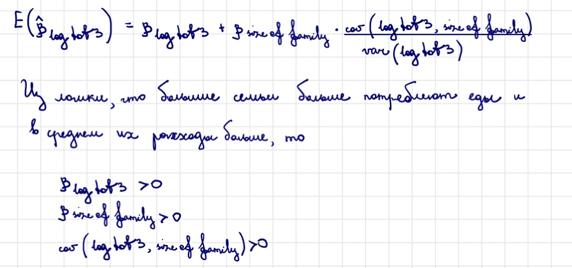


Тогда оценка беты при log tot3 будет завешена, то есть мы переоцениваем эластичность по доходу 


### Множественная регрессия log_f3 на log_tot3, nahm, nch06, nch711

Сравнение с результатом парной регрессии: оценка беты при log tot3 действительно оказалась завышенной, как мы и предположили в пункте (5).
Все регрессоры являются статистически значимыми на 1% уровне значимости, и качество прогноза (или качество объяснения для причинно-следственных связей) выигрывает от того, что мы их добавили другие регрессоры

In [40]:
X_6 = data[['log_tot3', 'nahm', 'nch06', 'nch711']]
X_6 = sm.add_constant(X_6)
y = data['log_f3']

model_6 = sm.OLS(y, X_6).fit(cov_type='HC0')

print(model_6.summary())

conf_int_6 = model_6.conf_int().loc['log_tot3']
print()
print(f"95%-й доверительный интервал: {conf_int_6.values}")

print()
generate_stargazer_html(models=[model_6],
                        title='Модель из пункта 6. Множественная регрессия',
                        output_file='regression_results_6.html',
                        dependent_var_name='Log расходов на питание')

                            OLS Regression Results                            
Dep. Variable:                 log_f3   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     89.66
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           4.23e-55
Time:                        02:17:14   Log-Likelihood:                -146.69
No. Observations:                 427   AIC:                             303.4
Df Residuals:                     422   BIC:                             323.7
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4954      0.407     11.034      0.0

### Отличается ли влияние детей в возрасте до 6 лет от влияния детей в возрасте от 7 до 11 лет?
По статистике Вальда, нулевая гипотеза отвергается, влияние детей разныз возрастных групп не отличается

In [43]:
hyp = 'nch06 = nch711'
wald_test = model_6.wald_test(hyp, scalar = False).pvalue.round (3)
float (wald_test)

0.447

### Новая переменная log_tot3^2

In [47]:
data['log_tot3s'] = data['log_tot3']**2
X_9 = data[['log_tot3', 'log_tot3s', 'nahm', 'nch06', 'nch711']]
X_9 = sm.add_constant(X_9)

# Модель с квадратичным членом
model_9 = sm.OLS(y, X_9).fit(cov_type='HC0')

# Проверка значимости
print(model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_f3   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     77.27
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.29e-57
Time:                        02:20:57   Log-Likelihood:                -141.89
No. Observations:                 427   AIC:                             295.8
Df Residuals:                     421   BIC:                             320.1
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.6135      6.057     -2.083      0.0

In [49]:
generate_stargazer_html(models=[model_9],
                        title='Модель из пункта 9. Множественная регрессия с квадратичным членом',
                        output_file='regression_results_9.html',
                        dependent_var_name='Log расходов на питание')

Результаты регрессии сохранены в файл regression_results_9.html.


### Эластичность при различных уровнях дохода tot3

In [52]:
def calculate_elasticity_and_se(model, values):
    results = []
    
    for total_expenses in values:
        #формула эластичности
        elasticity = model.params['log_tot3'] + 2 * model.params['log_tot3s'] * np.log(total_expenses)
        
        #стандартная ошибка
        grad = np.array([1, 2 * np.log(total_expenses)])
        var_elasticity = grad.T @ model.cov_params().loc[['log_tot3', 'log_tot3s'], ['log_tot3', 'log_tot3s']] @ grad
        se_elasticity = np.sqrt(var_elasticity)
        
        #доверительный интервал
        lower = elasticity - 1.96 * se_elasticity
        upper = elasticity + 1.96 * se_elasticity
        
        # Добавляем результаты в список
        results.append({
            'Общие расходы': total_expenses,
            'Эластичность': elasticity,
            'Стандартная ошибка': se_elasticity,
            'Нижняя граница доверительного интервала': lower,
            'Верхняя граница доверительного интервала': upper
        })
    
    #преобразуем результаты в DataFrame
    df_results = pd.DataFrame(results)
    return df_results

#значения общих расходов от 2000 до 40000 с шагом 2000
values = np.arange(2000, 40001, 2000)

#рассчитываем эластичность и стандартную ошибку для этих значений
elasticity_df = calculate_elasticity_and_se(model_9, values)

#сохраняем таблицу в excel
output_file = 'elasticity_results.xlsx'
elasticity_df.to_excel(output_file, index=False)

print(f"Результаты сохранены в файл: {output_file}")

Результаты сохранены в файл: elasticity_results.xlsx


### Бинарные переменные для 13 провинций
Почему не следует включать все 13 бинарных переменных? – чтобы избежать dummy trap, когда одну dummy можно линейно выразить через остальные – ситуация полной мультиколлинеарности. 
Результат проверки не должен зависеть от того, какие провинции мы выбираем для включения, иначе это не имело бы смысла: получалось бы, что тестами легко манипулировать. Я здесь исключаю провинцию 1, которая берется как базовая


In [58]:
X_6 = data[['log_tot3', 'nahm', 'nch06', 'nch711']]
y = data['log_f3']

dummies_province = pd.get_dummies(data['prov'], prefix='prov', drop_first=True)

X_12 = pd.concat([X_6, dummies_province], axis=1)

X_12 = X_12.fillna(0).astype(float)
X_12= sm.add_constant(X_12)

model_12 = sm.OLS(y, X_12).fit(cov_type='HC0')
print(model_12.summary())

print()
generate_stargazer_html(models=[model_12],
                        title='Модель из пункта 12. Регрессия c бинарными переменными провинций',
                        output_file='regression_results_12.html',
                        dependent_var_name='Log расходов на питание')

                            OLS Regression Results                            
Dep. Variable:                 log_f3   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     24.73
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.78e-50
Time:                        02:24:29   Log-Likelihood:                -139.59
No. Observations:                 427   AIC:                             313.2
Df Residuals:                     410   BIC:                             382.1
Df Model:                          16                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4764      0.408     10.972      0.0

### Cовместная значимость эффекта провинции
Совместное влияние провинций незначимо

In [61]:
#тест Вальда
hyp = 'prov_2 = prov_3 = prov_4 = prov_5 = prov_6 = prov_7 = prov_8 = prov_9 = prov_10 = prov_11 = prov_12 = prov_13 = 0'
province_columns = [col for col in X_12.columns if col.startswith('prov_')]
if province_columns:
    wald_test = model_12.wald_test(hyp, scalar = True).pvalue.round (3)
print ()
print(wald_test)


0.242


### Бинарные переменные для социальных классов

In [65]:
X_6 = data[['log_tot3', 'nahm', 'nch06', 'nch711']]
y = data['log_f3']

dummies_classes = pd.get_dummies(data['scl'], prefix='scl', drop_first=True)

X_13 = pd.concat([X_6, dummies_classes], axis=1)

X_13 = X_13.fillna(0).astype(float)
X_13 = sm.add_constant(X_13)

model_13 = sm.OLS(y, X_13).fit(cov_type='HC0')
print(model_13.summary())

print()
generate_stargazer_html(models=[model_13],
                        title='Модель из пункта 13. Регрессия c бинарными переменными социальных классов',
                        output_file='regression_results_13.html',
                        dependent_var_name='Log расходов на питание')

#тест Вальда
hyp = 'scl_2 = scl_3 = scl_4 = scl_5 = 0'
classes_columns = [col for col in X_13.columns if col.startswith('scl_')]
if classes_columns:
    wald_test_13 = model_13.wald_test(hyp, scalar = True).pvalue.round (3)
print ()
print(wald_test_13)

                            OLS Regression Results                            
Dep. Variable:                 log_f3   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     48.05
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.12e-54
Time:                        02:26:19   Log-Likelihood:                -141.84
No. Observations:                 427   AIC:                             301.7
Df Residuals:                     418   BIC:                             338.2
Df Model:                           8                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0927      0.483      8.477      0.0

### Таблица для результата всех регрессий

In [68]:
def generate_custom_html_table(models, variables, additional_info, title, output_file):
   
    def extract_model_results_with_significance(model, variables):
        #Извлекает коэффициенты, их стандартные ошибки и значимость из модели.
        
        coef = model.params
        std_err = model.bse
        p_values = model.pvalues
        results = []
        for var in variables:
            if var in coef.index:
                stars = ""
                if p_values[var] < 0.01:
                    stars = "***"
                elif p_values[var] < 0.05:
                    stars = "**"
                elif p_values[var] < 0.1:
                    stars = "*"
                results.append(f"{coef[var]:.3f}{stars} ({std_err[var]:.3f})")
            else:
                results.append("–")  # Если переменной нет в модели
        return results

    # Заголовок таблицы
    table_header = """
    <table style="border-collapse: collapse; width: 100%; text-align: center;">
        <tr style="border: 1px solid black; background-color: #f2f2f2;">
            <th>Переменные</th>
    """
    for i in range(len(models)):
        table_header += f"<th>Модель {i + 1}<br>log расходов на питание</th>"
    table_header += "</tr>"

    # Тело таблицы
    rows = ""
    for var_index, variable_name in enumerate([
        "log полных расходов", 'Квадрат log полных расходов', "Число взрослых", "Число детей до 6 лет",
        "Число детей от 7 до 11 лет", "Константа", "Провинции", "Социальные классы",
        "Число наблюдений", "R²"
    ]):
        rows += "<tr>"
        rows += f"<td style='border: 1px solid black; padding: 5px;'>{variable_name}</td>"
        for model_index, model in enumerate(models):
            if var_index < len(variables):  # Основные переменные регрессии
                results = extract_model_results_with_significance(model, variables)
                rows += f"<td style='border: 1px solid black; padding: 5px;'>{results[var_index]}</td>"
            else:  # Дополнительная информация
                additional_row = additional_info[model_index][var_index - len(variables)]
                rows += f"<td style='border: 1px solid black; padding: 5px;'>{additional_row}</td>"
        rows += "</tr>"

    # Закрытие таблицы
    table_footer = "</table>"

    # Генерация полного HTML-документа
    html = f"""
    <!DOCTYPE html>
    <html>
    <head>
    <meta charset="UTF-8">
    <title>{title}</title>
    <style>
        table {{ border-collapse: collapse; width: 100%; text-align: center; }}
        th, td {{ border: 1px solid black; padding: 5px; }}
        th {{ background-color: #f2f2f2; }}
    </style>
    </head>
    <body>
    <h1>{title}</h1>
    {table_header}
    {rows}
    {table_footer}
    </body>
    </html>
    """

    # Сохранение в файл
    with open(output_file, 'w', encoding='utf-8') as file:
        file.write(html)
    
    print(f"Результаты сохранены в файл {output_file}.")

In [70]:
variables = ['log_tot3', 'log_tot3s','nahm', 'nch06', 'nch711', 'const']
additional_info = [
    ["Нет", "Нет", int(model_4.nobs), f"{model_4.rsquared:.3f}"],
    ["Нет", "Нет", int(model_6.nobs), f"{model_6.rsquared:.3f}"],
    ["Нет", "Нет", int(model_9.nobs), f"{model_9.rsquared:.3f}"],
    ["Да", "Нет", int(model_12.nobs), f"{model_12.rsquared:.3f}"],
    ["Нет", "Да", int(model_13.nobs), f"{model_13.rsquared:.3f}"]
]

generate_custom_html_table(
    models=[model_4, model_6, model_9, model_12, model_13],
    variables=variables,
    additional_info=additional_info,
    title="Результаты регрессий",
    output_file="regression_results_all.html"
)

Результаты сохранены в файл regression_results_all.html.
